In [2]:
import numpy as np
import matplotlib.pyplot as plt
import utils
import pandas as pd
from pathlib import Path


In [16]:
np.random.seed(1337)
data = [utils.load_compas_alt()["train"],utils.load_synthetic()["train"],
        utils.load_synthetic("simple")["train"], utils.load_adult()["train"]]
RESPONSES = ["two_year_recid" ,"two_year_recid" , "y", "income"] 
x_axis = np.append(np.linspace(-3,6,300), np.linspace(6.01, 10, 300))

In [4]:
np.around(utils.load_adult()["train"])

,age,education,education-num,occupation,relationship,capital-gain,capital-loss,hours-per-week,native-country,race,gender,marital-status,workclass,income
14340,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0,0,1,0
3270,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0,1,1,1,0
19547,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0,1,1,1,0
7744,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0,1,1,0
3613,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13688,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0,0,0,1,0
5404,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0,0,1,1,1
4690,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1,1,1,0
9371,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0,0,1,1,1


In [5]:
def sigmoid(x, alpha):
    z = np.exp(-x+alpha)
    sig = 1 / (1 + z)
    return sig


recid = [ 3.693, 2.84,1.94, 1.033,0.91]
synth_simple = [2.96, 1.94,0.979, 0.1,-0.41]

In [6]:
#simple = [,-1.858]

In [7]:
x_axis[38]

-1.8561872909698995

In [8]:
#results["y"][110:120]

In [9]:
#ps = sigmoid(dataset.drop(resp, axis = 1).sum(axis = 1) + noise, alpha)

#np.random.binomial(1,ps, size = len(ps)).sum()/len(ps)

In [10]:
def data_remover_cat(full_data, missing_col, alpha, noise, missing_pct = None, missingness="mar"):
    # Missing_pct is in the range 0 to 100
    data = full_data.copy()
    if missingness == "mar":
        ps = sigmoid(data.drop(missing_col, axis = 1).sum(axis = 1) + noise, alpha)
        data["miss"] = np.random.binomial(1,ps, size = len(ps))
        data[missing_col] = data[missing_col].mask((data["miss"]==1),
                                                    other=np.nan)
        data.drop("miss", axis=1, inplace=True)

    else:
        mcar = np.random.binomial(n=1, p=missing_pct/100, size=len(data))
        data["miss"] = [1 if m == 1 else 0 for m in mcar]
        data[missing_col] = data[missing_col].mask(data["miss"] == 1,
                                                   other=np.nan)
        data = data.drop("miss", axis=1)
    return data

In [11]:
data_remover_cat(data[0], "priors_count", 0.0, np.random.normal(0,0.1,size = len(data[0])), 88, "MCAR").isna().sum()/len(data[0])

priors_count                  0.876904
crime_factor                  0.000000
gender_factor                 0.000000
is_Caucasian                  0.000000
age_factor_Greater than 45    0.000000
age_factor_Less than 25       0.000000
two_year_recid                0.000000
dtype: float64

In [12]:
SIMPLE_ALPHA = [1000, 3.86, 2.96, 1.94,0.979, 0.1]
RECID_ALPHA = [1000, 3.693, 2.84,1.94, 1.033,0.91]
RECID_ALPHA2 = [1000, 4.0, 3.693, 2.84,1.94,]

In [43]:
str(True)

'True'

In [42]:
# alpha = [1000, 7.267, 6.799, 6.23,5.5,4.92]
x_axis[394]

7.2643812709030104

In [39]:
results["income"][385:395]

[0.1295186689115579,
 0.12558185599683075,
 0.12149648410418937,
 0.11741111221154799,
 0.11391997623056353,
 0.11057739922749331,
 0.10743290086164207,
 0.10416460334752897,
 0.10129246310785382,
 0.0980489254233931]

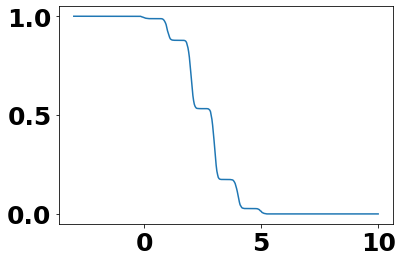

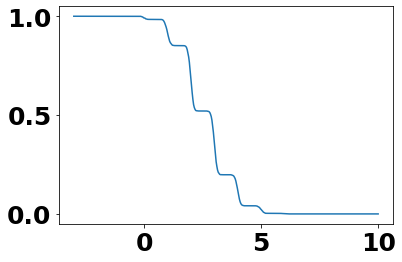

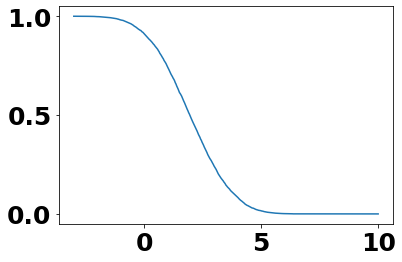

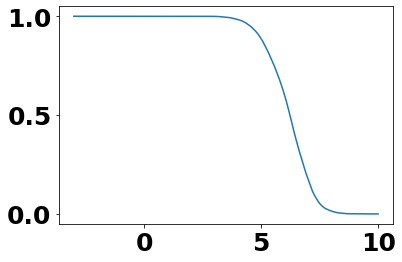

<Figure size 432x288 with 0 Axes>

In [17]:
missingness_percentages = [0, 5,10,25,50,75]
results ={}
potential_alphas = {resp: {i:{} for i in missingness_percentages} for resp in RESPONSES}
for dataset, resp in zip(data, RESPONSES):
    missing = []
    np.random.seed(1337)
    noise = np.random.normal(0,0.1,size = len(dataset))
    for alpha in x_axis:
        ps = sigmoid(dataset.drop(resp, axis = 1).sum(axis = 1) + noise, alpha)
        miss = np.around(ps).sum()/len(ps)
        missing.append(miss)
        if miss>0.94 and miss<0.96:
            potential_alphas[resp][5][alpha] = miss
        if miss>0.89 and miss<0.91:
            potential_alphas[resp][10][alpha] = miss
        if miss>0.74 and miss<0.76:
            potential_alphas[resp][25][alpha] = miss
        if miss>0.49 and miss<0.51:
            potential_alphas[resp][50][alpha] = miss
        if miss>0.04 and miss<0.06:
            potential_alphas[resp][75][alpha] = miss
        
    results[resp] = missing
    plt.plot(x_axis, missing)
    plt.show()
    plt.clf()
    

In [ ]:
print(potential_alphas)

{'two_year_recid': {0: {}, 5: {-1.0434782608695652: 0.9593712212817412, -0.8929765886287626: 0.9567716141929036, -0.8628762541806019: 0.9505247376311844, -0.8327759197324416: 0.9510244877561219, -0.8026755852842808: 0.9427786106946526, -0.7725752508361206: 0.9435282358820589, -0.7424749163879598: 0.9472763618190905, -0.7123745819397991: 0.9460269865067467, -0.6822742474916388: 0.9452773613193404, -0.652173913043478: 0.9432783608195902, -0.6220735785953178: 0.9400241837968561, -0.591973244147157: 0.9405078597339782, -0.5618729096989967: 0.9419588875453446, -0.531772575250836: 0.9446191051995163, -1.1337792642140467: 0.9540229885057471, -0.9832775919732439: 0.955272363818091, -0.9531772575250836: 0.9527736131934033, -0.9230769230769229: 0.955272363818091}, 10: {-0.08026755852842804: 0.8985507246376812, -0.02006688963210701: 0.9085457271364318, 0.010033444816053727: 0.8973013493253373, 0.04013377926421402: 0.8943028485757122, 0.07023411371237476: 0.9005497251374313, 0.10033444816053505: 0